In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("artelingo28_train_final.csv")
df

,genre,emotion,caption,art_style,painting,language
0,genre_painting,awe,"""စိတ္တဇပန်းချီဆန်ဆန်ပန်းချီကားလေးမှာ အမျိုးသမီ...",Expressionism,edvard-munch_children-in-the-street-1915,Burmese
1,landscape,contentment,"""မြစ်ချောင်းနံဘေးက နှစ်ထပ်အိမ်လေးရယ်၊ အရိပ်ရတဲ...",Impressionism,hoca-ali-riza_sanat-detay,Burmese
2,religious_painting,disgust,"""ခေါင်းဖြတ်သတ်တဲ့ အလုပ်ကို ဘယ်လိုမှမခံစားရပုံပ...",Northern_Renaissance,albrecht-altdorfer_beheading-of-john-the-bapti...,Burmese
3,religious_painting,sadness,"""ပရိဒေဝမီးတောက်လောင်ပုံပေါ်နေသည့် သားအမိ "" 692",Early_Renaissance,giovanni-bellini_madonna-with-child-1455,Burmese
4,religious_painting,contentment,"""လောကီကိုပယ်ပြီး လောကုတ္တရာတရားကျင့်ရန် တောတော...",Symbolism,nicholas-roerich_red-lama-1924,Burmese
...,...,...,...,...,...,...
154223,cityscape,other,"""Para tukang sedang melakukan proses pembangun...",Pointillism,giacomo-balla_a-worker-s-day-1904,Indonesian
154224,portrait,contentment,"""Wajah tampan seorang seniman dan politisi Pol...",Romanticism,orest-kiprensky_portrait-of-adam-mickiewicz-1825,Indonesian
154225,abstract_painting,excitement,"""Coretan abstrak dengan aneka ragam warna sehi...",Abstract_Expressionism,sam-francis_untitled-from-pasadena-box-1963-1,Indonesian
154226,abstract_painting,other,"""Sebuah bingkai hitam dengan isian warna abu-a...",Minimalism,jo-baer_untitled-1968,Indonesian


In [4]:
df['emotion'] = df['emotion'].replace('other','something else')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154228 entries, 0 to 154227
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   genre      154228 non-null  object
 1   emotion    154228 non-null  object
 2   caption    154228 non-null  object
 3   art_style  154228 non-null  object
 4   painting   154228 non-null  object
 5   language   154228 non-null  object
dtypes: object(6)
memory usage: 7.1+ MB


In [6]:
df.describe()

,genre,emotion,caption,art_style,painting,language
count,154228,154228,154228,154228,154228,154228
unique,9,9,150913,27,1658,25
top,portrait,contentment,Kiri otteliua murima muaha wa conniaca yookiss...,Impressionism,pyotr-konchalovsky_portrait-of-the-singer-zara...,Tagalog
freq,35795,45193,505,28337,114,8338


## univariate

In [7]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

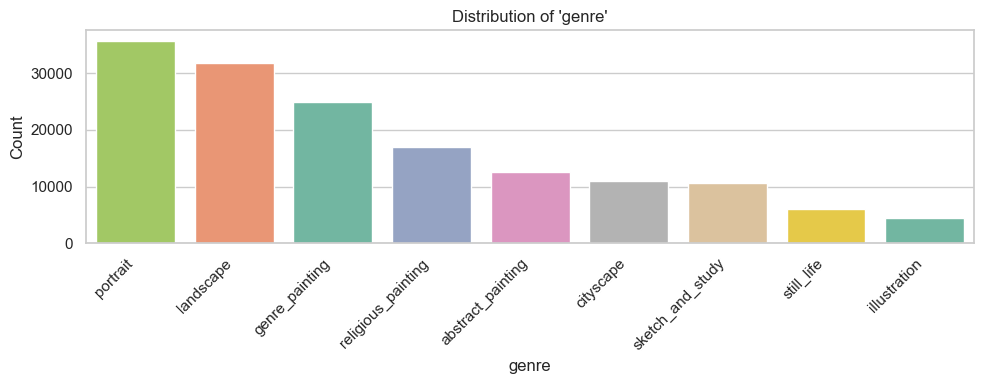

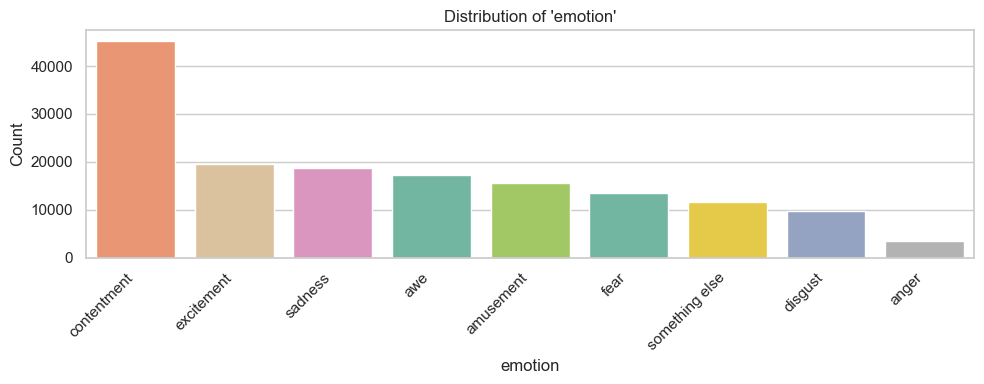

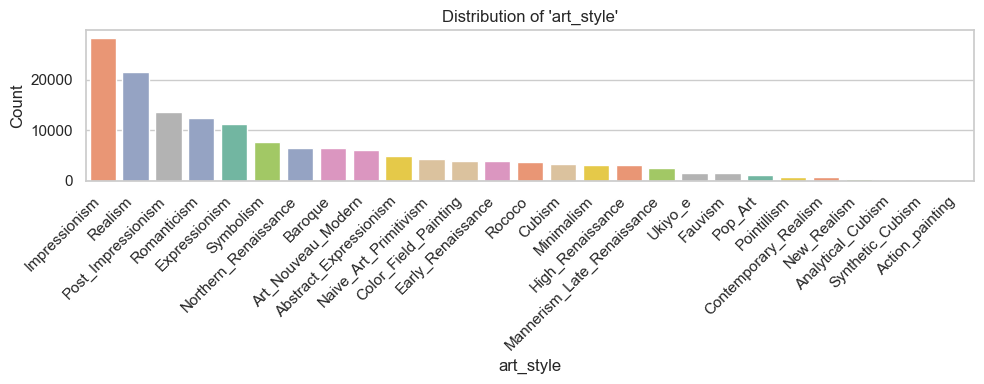

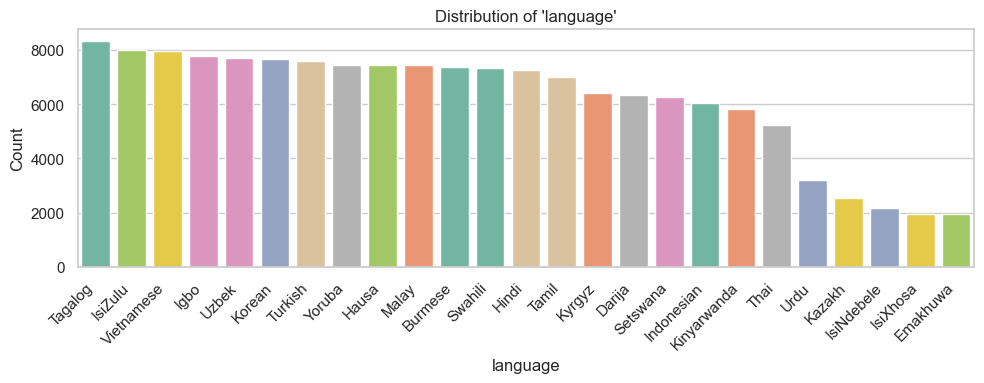

In [ ]:
sns.set_theme(style="whitegrid")

categorical_features = ['genre', 'emotion', 'art_style', 'language']

for col in categorical_features:
    plt.figure(figsize=(10, 4))


    sns.countplot(
        data=df,
        x=col,
        hue=col,
        order=df[col].value_counts().index,
        palette="Set2",
        legend=False
    )
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


### Genre

In [9]:
df['genre'].value_counts(normalize=True) * 100

genre
portrait              23.209145
landscape             20.642815
genre_painting        16.166325
religious_painting    10.994113
abstract_painting      8.180097
cityscape              7.142672
sketch_and_study       6.928703
still_life             3.889047
illustration           2.847084
Name: proportion, dtype: float64

- The dataset is **imbalanced**.
- The **distribution is right-skewed**.
- This **may affect downstream tasks** such as **classification** or **clustering**.

### Emotions  

- We got others in emotions that should not be here so i convert them to "somethings else"

In [10]:
df['emotion'].value_counts(normalize=True) * 100

emotion
contentment       29.302721
excitement        12.682522
sadness           12.065902
awe               11.110175
amusement         10.129808
fear               8.683897
something else     7.514848
disgust            6.335425
anger              2.174702
Name: proportion, dtype: float64

- **Class imbalance** is present in the dataset.
- The distribution is **right-skewed**.
- Annotators tend to report **fewer emotions like anger or disgust**, while **contentment** is the most commonly expressed feeling.

### Art style

In [11]:
df['art_style'].value_counts(normalize=True) * 100

art_style
Impressionism                 18.373447
Realism                       13.937158
Post_Impressionism             8.880359
Romanticism                    8.104884
Expressionism                  7.300879
Symbolism                      4.984179
Northern_Renaissance           4.262520
Baroque                        4.250849
Art_Nouveau_Modern             3.918873
Abstract_Expressionism         3.242602
Naive_Art_Primitivism          2.762144
Color_Field_Painting           2.585782
Early_Renaissance              2.555956
Rococo                         2.434059
Cubism                         2.119589
Minimalism                     2.081983
High_Renaissance               2.024276
Mannerism_Late_Renaissance     1.681925
Ukiyo_e                        1.075680
Fauvism                        0.969992
Pop_Art                        0.809840
Pointillism                    0.540758
Contemporary_Realism           0.488887
New_Realism                    0.258708
Analytical_Cubism             

- The dataset is **right-skewed**.
- There is a noticeable **imbalance**, with the **top 5 categories making up over 56%** of the dataset.
- There are **fewer painters** associated with **Action Painting** and **Synthetic Cubism** compared to **Impressionism** and **Realism**.

### Lng

In [12]:
df['language'].value_counts(normalize=True) * 100

language
Tagalog        5.406282
IsiZulu        5.175455
Vietnamese     5.162487
Igbo           5.036699
Uzbek          4.992608
Korean         4.973805
Turkish        4.910263
Yoruba         4.836346
Hausa          4.835049
Malay          4.829862
Burmese        4.772156
Swahili        4.745571
Hindi          4.702778
Tamil          4.529009
Kyrgyz         4.160723
Darija         4.111445
Setswana       4.066706
Indonesian     3.914983
Kinyarwanda    3.780766
Thai           3.403403
Urdu           2.067718
Kazakh         1.648858
IsiNdebele     1.403766
IsiXhosa       1.275384
Emakhuwa       1.257878
Name: proportion, dtype: float64

- **Distribution** of emotions is **moderately uniform**.
- **Diversity** in emotional responses is **strong**.

## Bivariant

In [ ]:
def grouped_bar(df, x, hue, title):
    plt.figure(figsize=(20, 12))
    sns.countplot(data=df, x=x, hue=hue)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=hue, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

def heatmap(df, x, y, title):
    ct = pd.crosstab(df[x], df[y])
    plt.figure(figsize=(20, 12))
    sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel(y)
    plt.ylabel(x)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def stacked_bar(df, x, y, title):
    ct = pd.crosstab(df[x], df[y], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(20, 12), colormap='tab20')
    plt.title(title)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=y, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

def bivariant(df, x, y):
    grouped_bar(df, x, y, f"{x} vs {y} - Bar Plot")
    heatmap(df, x, y, f"{x} vs {y} - Heatmap")
    stacked_bar(df, x, y, f"{x} vs {y} - Stacked Bar")

#### Genre VS Emotion

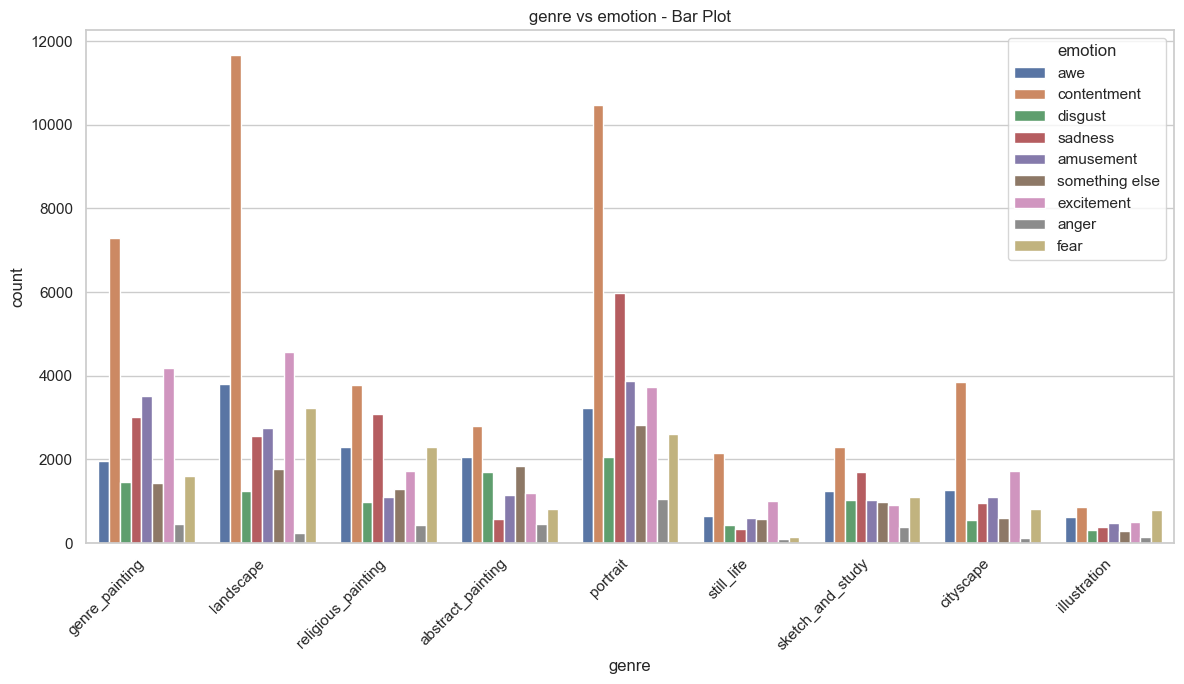

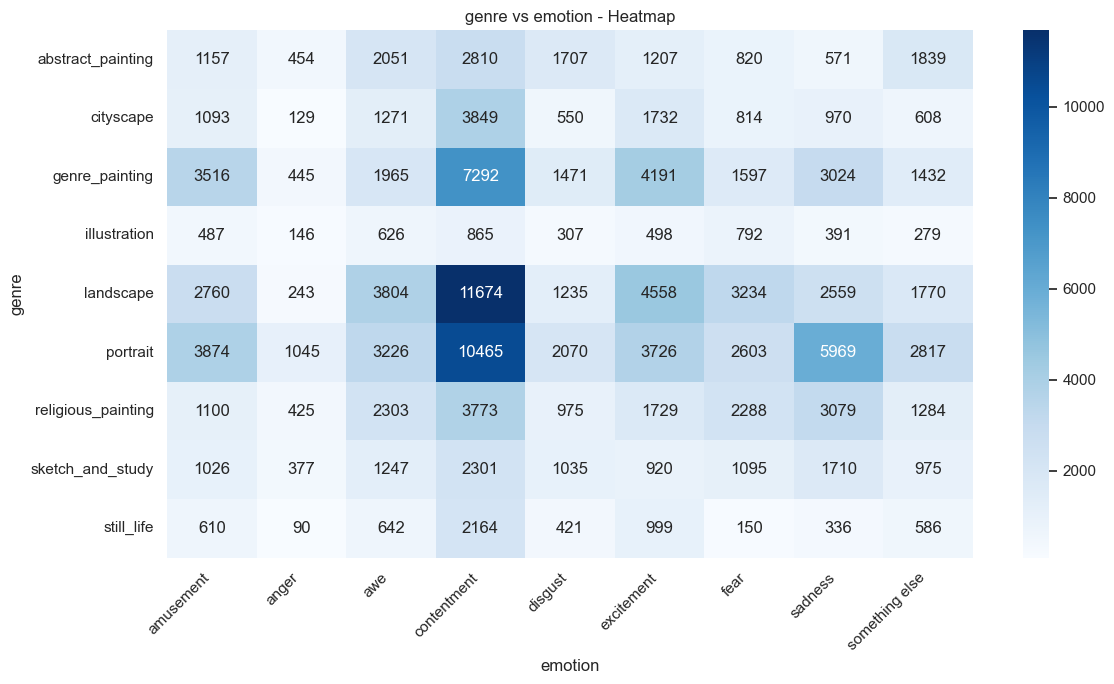

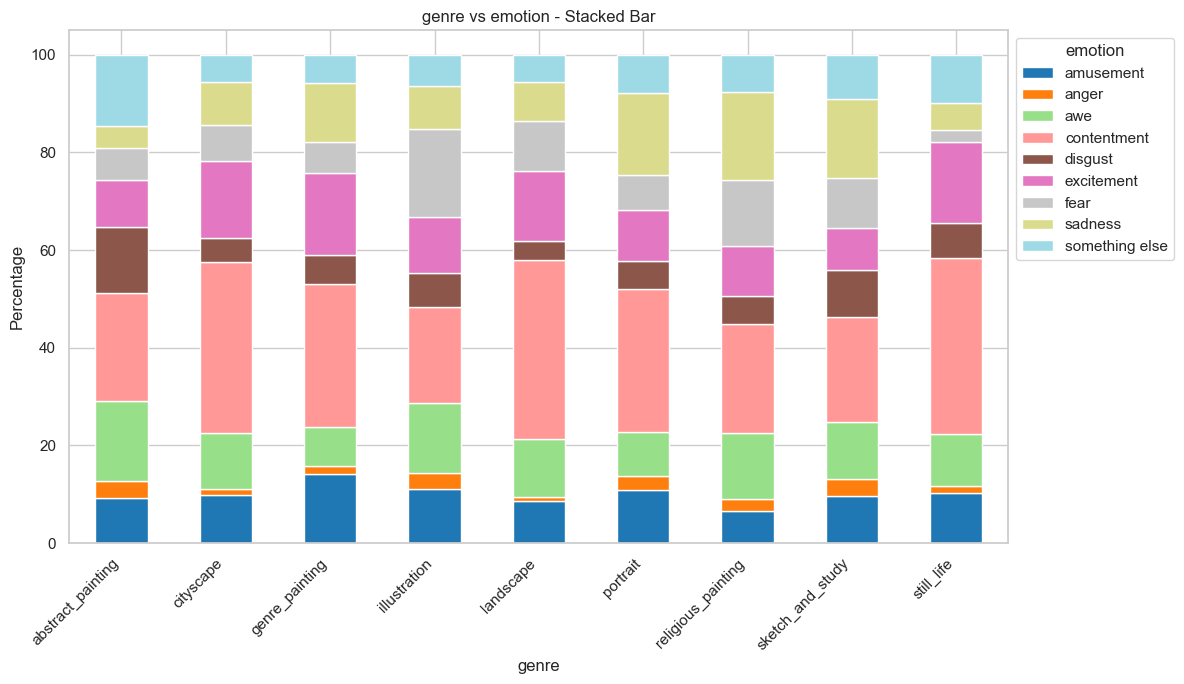

In [27]:
bivariant(df, 'genre', 'emotion')

- **Most annotators expressed a feeling of contentment:**
  - This leads to an imbalance in the dataset.
  - Contentment is most commonly associated with **portrait** and **landscape** images.

- **Anger** is the **least used emotion** to describe **abstract paintings** (by percentage).

- **Abstract paintings** are most frequently associated with the **"something else"** emotion category.


#### Genre VS art_style

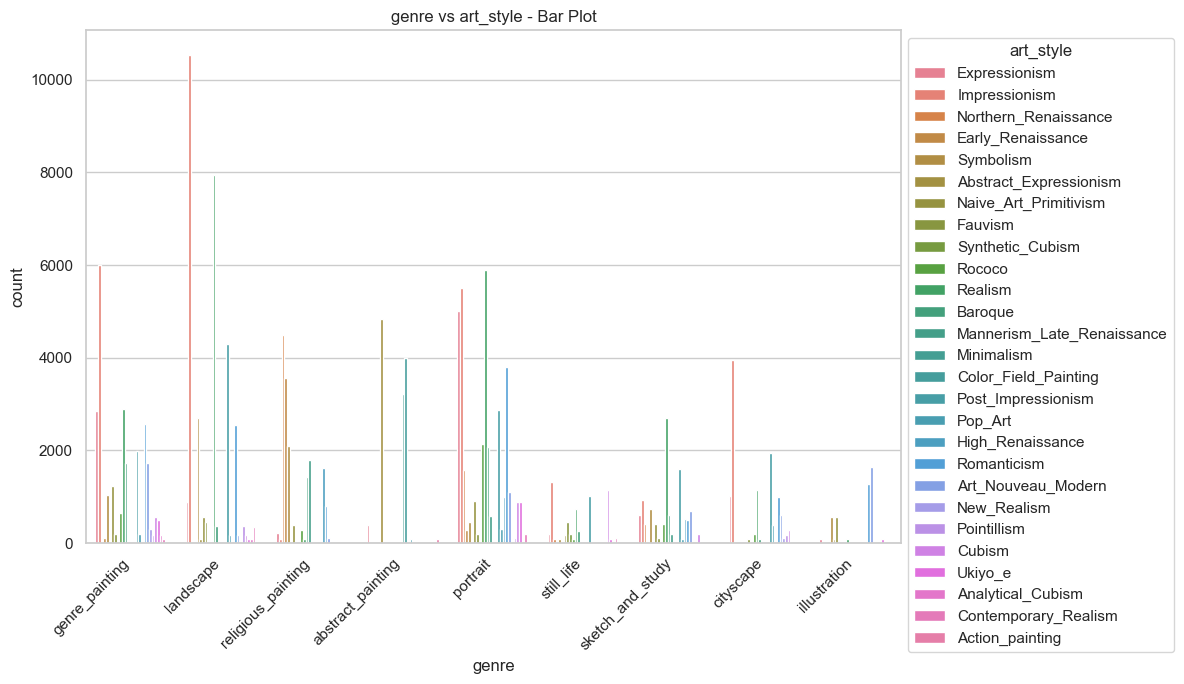

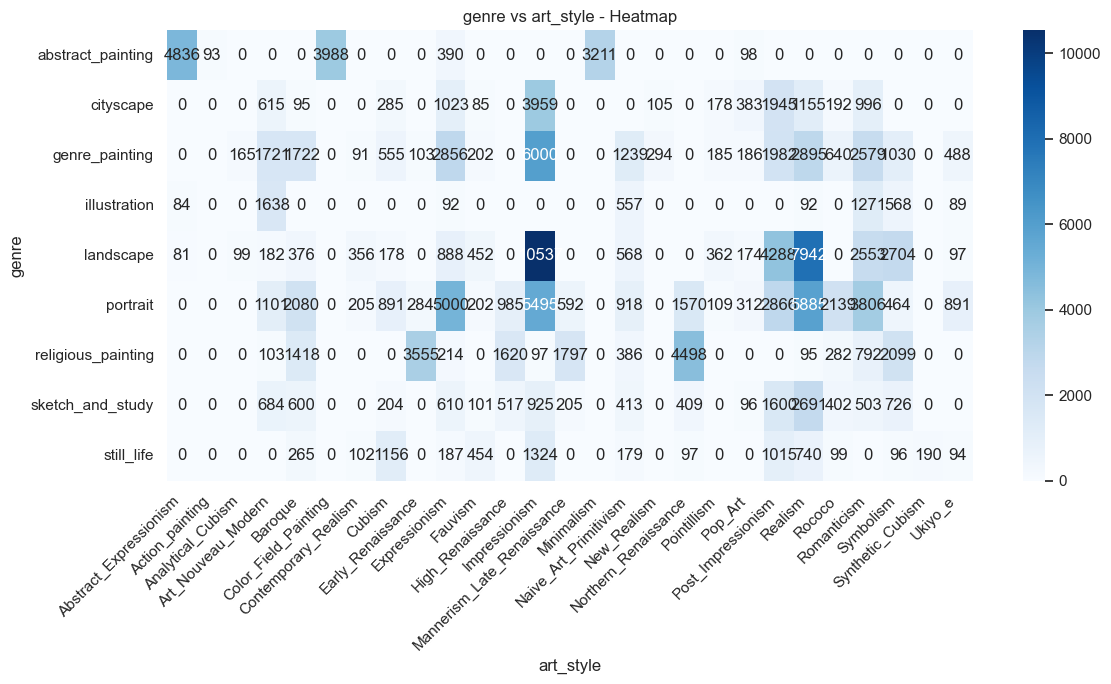

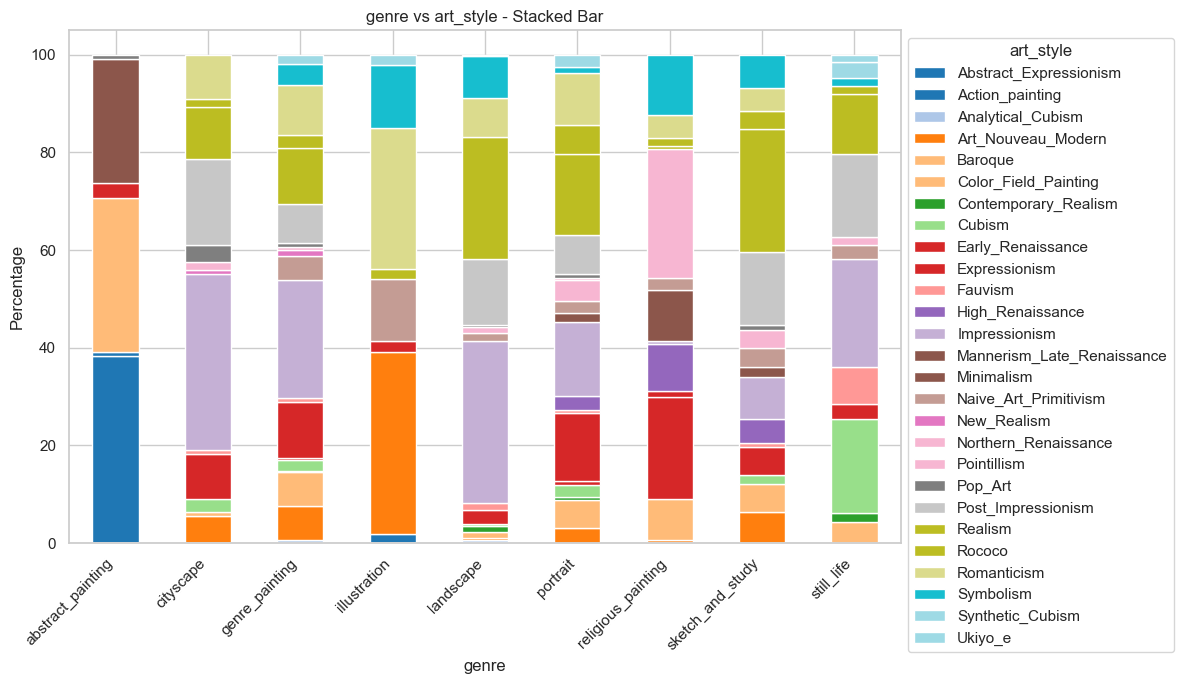

In [28]:
bivariant(df, 'genre', 'art_style')

- **Expressionism** dominates **genre_painting** with a high count

- This contributes to a notable **imbalance in style distribution** across genres. **Expressionism** is most commonly associated with **genre_painting** and **abstract_painting** images

- **Baroque** is the **least represented style** in **abstract paintings** (by percentage)

- **Abstract paintings** are most frequently associated with the **Abstract Expressionism** style category

#### language VS genre

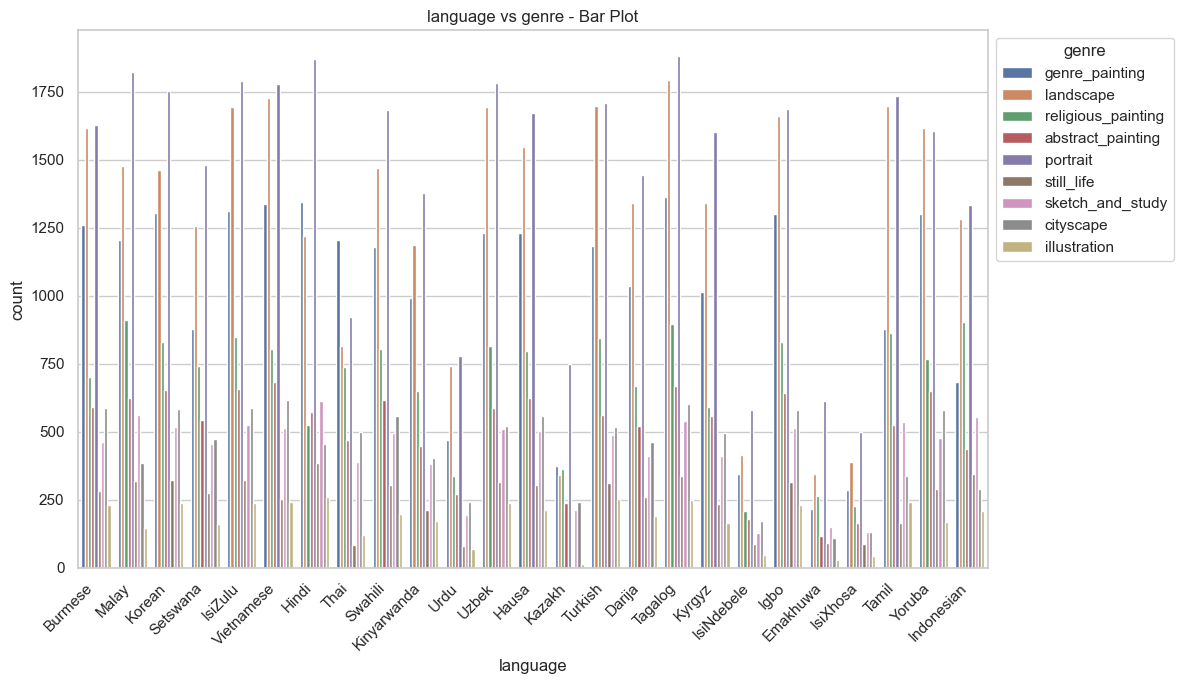

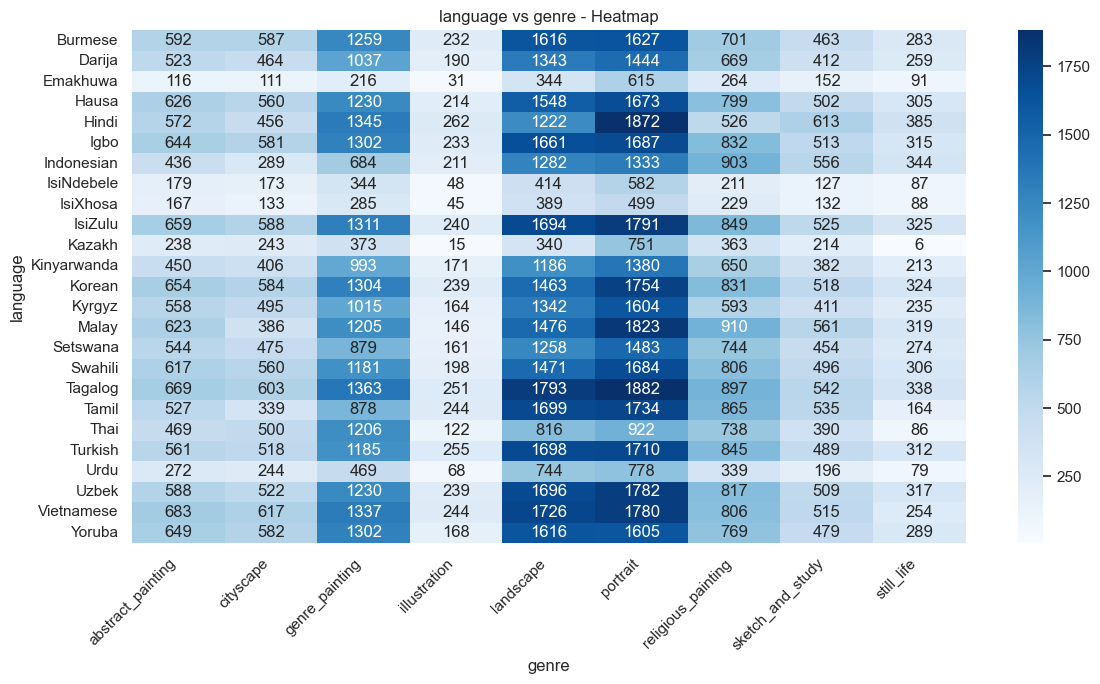

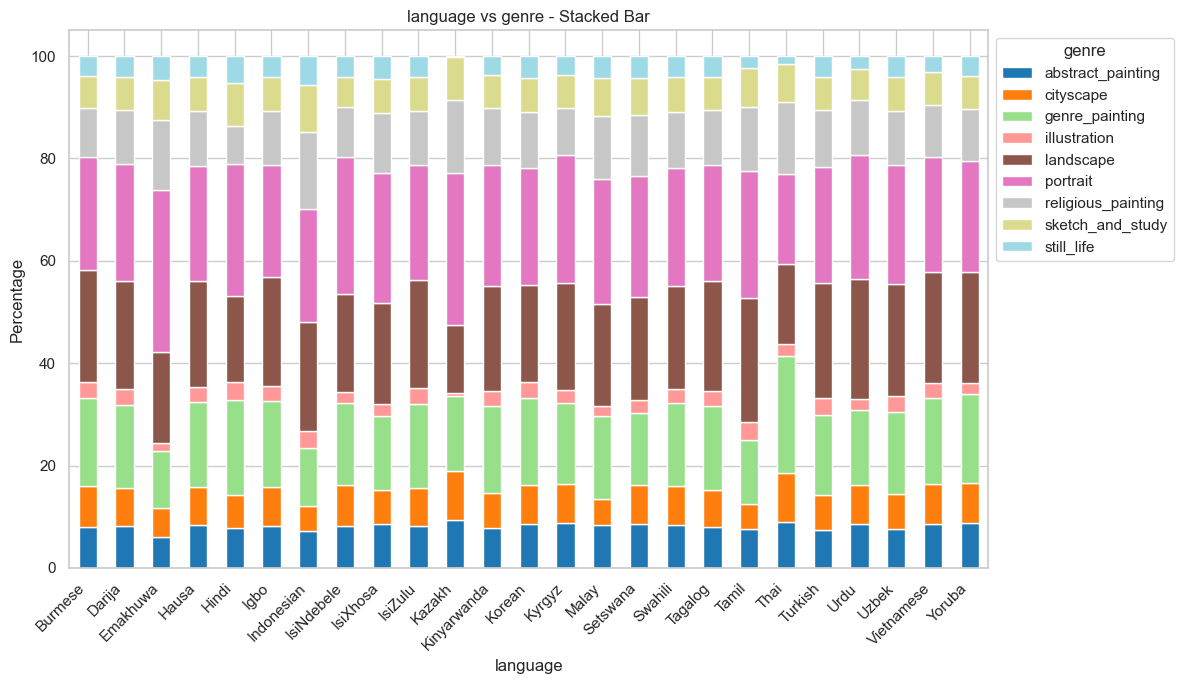

In [29]:
bivariant(df, 'language', 'genre')

- **Genre painting** is the most prevalent category, with high counts in languages such as **Hindi** and **Indonesian**
  
- This dominance contributes to a significant imbalance in genre distribution across languages, with **genre painting** and **landscape** painting predominantly linked to **well-represented** languages
  
- **Still life** is the least represented genre, particularly in languages like Urdu and Uzbek, where it accounts for the smallest proportion of artworks
  
- Landscape painting is most frequently associated with languages such as Hindi and Swahili, showing a strong presence in these linguistic groups

#### art_style VS emotion

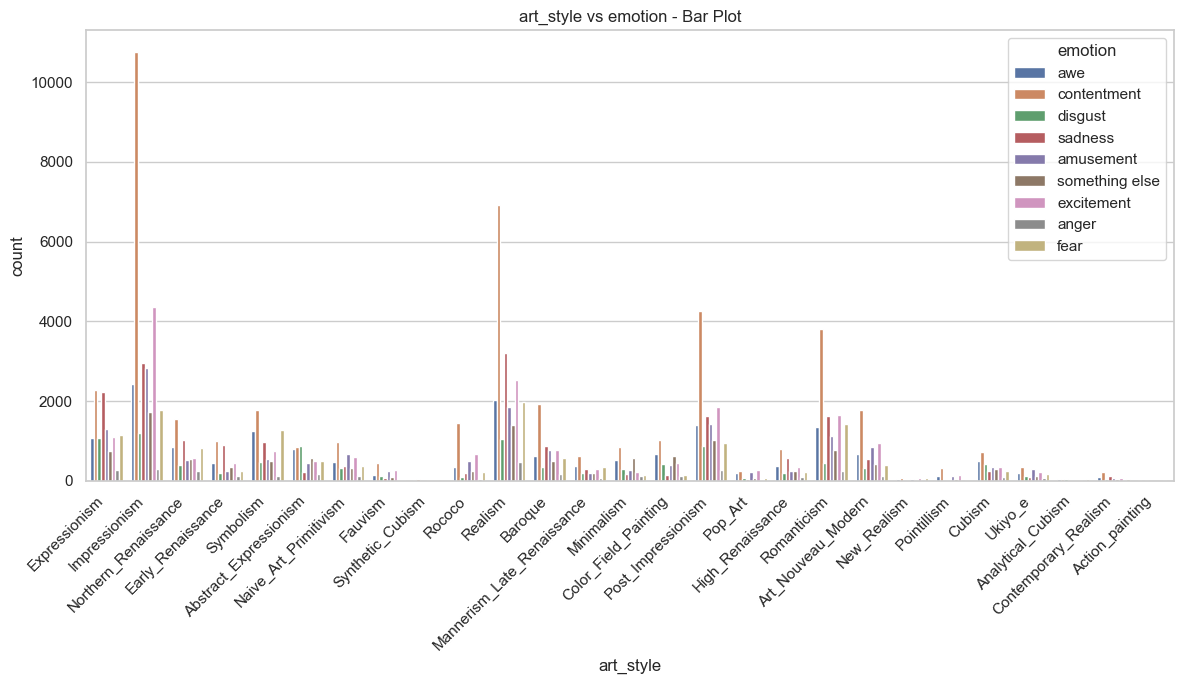

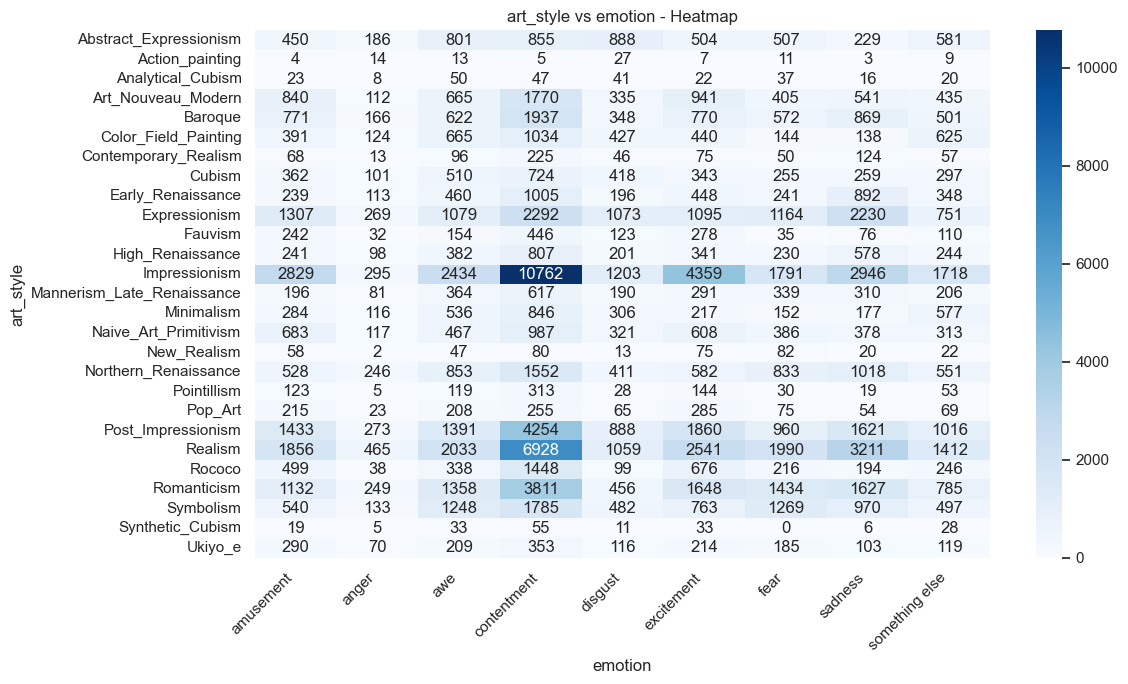

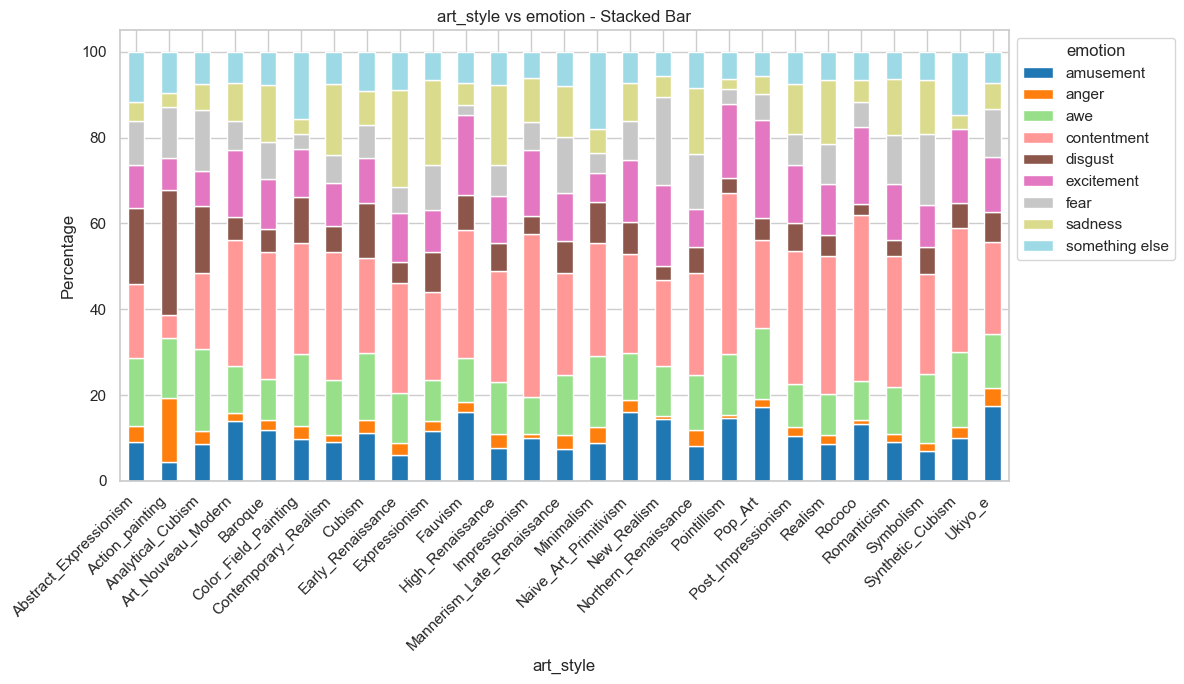

In [30]:
bivariant(df, 'art_style', 'emotion')

- **Impressionism** dominates with a high count in emotions like **sadness** and **something else**

- This contributes to a notable imbalance in emotional distribution across art styles, with **sadness** and **something else** being most commonly associated with **well-represented** styles

- **Excitement** is the least represented emotion in art styles like **Minimalism** and **Rococo** (by percentage)

- **Sadness** is most frequently associated with art styles such as **Impressionism** and **Realism**

#### language VS emotion

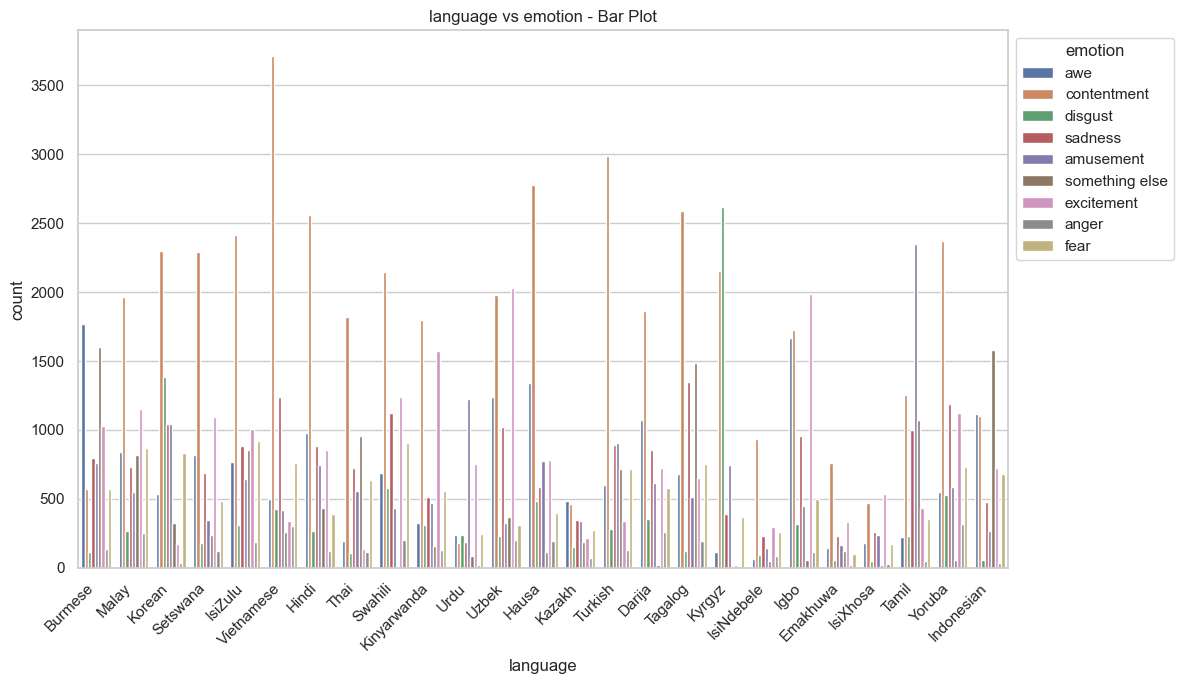

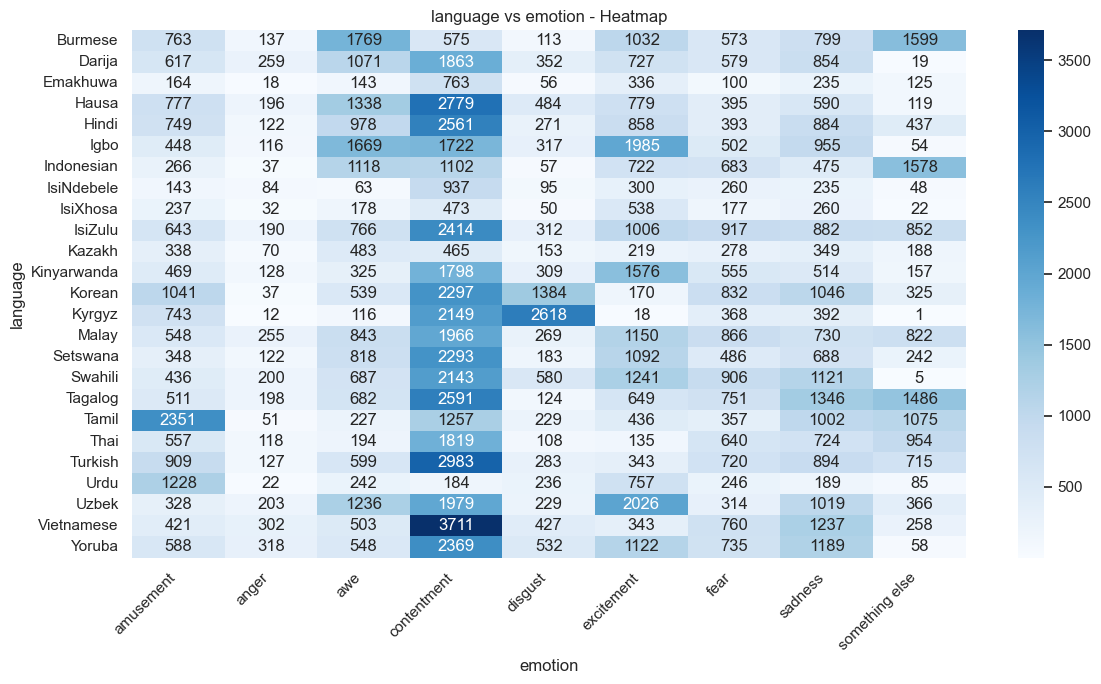

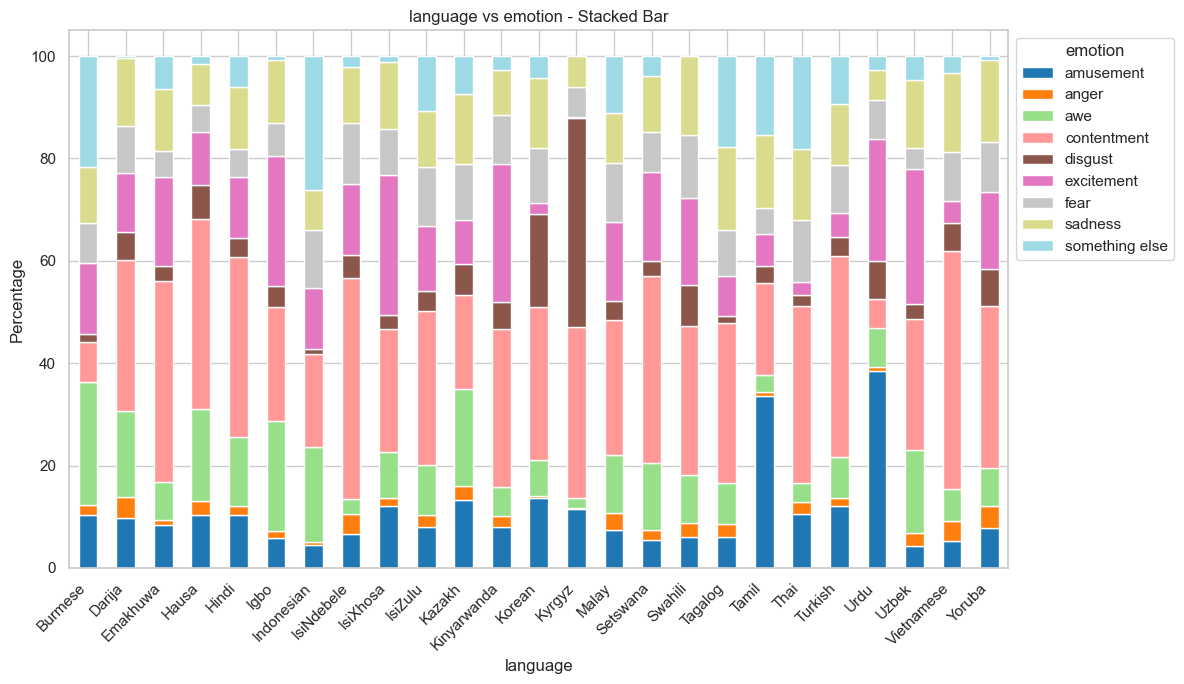

In [31]:
bivariant(df, 'language', 'emotion')

- **Awe** dominates emotion distribution with a high count in languages like **Indonesian**
  
- This contributes to a notable imbalance in emotion distribution across languages, with **awe** and **contentment** being most commonly associated with **well-represented** languages
  
- **Something else** is the least represented emotion in languages like **Emakhwa** and **Kyrgyz** (by percentage)
  
- **Awe** is most frequently associated with languages such as **Indonesian** and **Burmese**.